In [37]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/movies_train.csv'
df = pd.read_csv(url)

<Axes: >

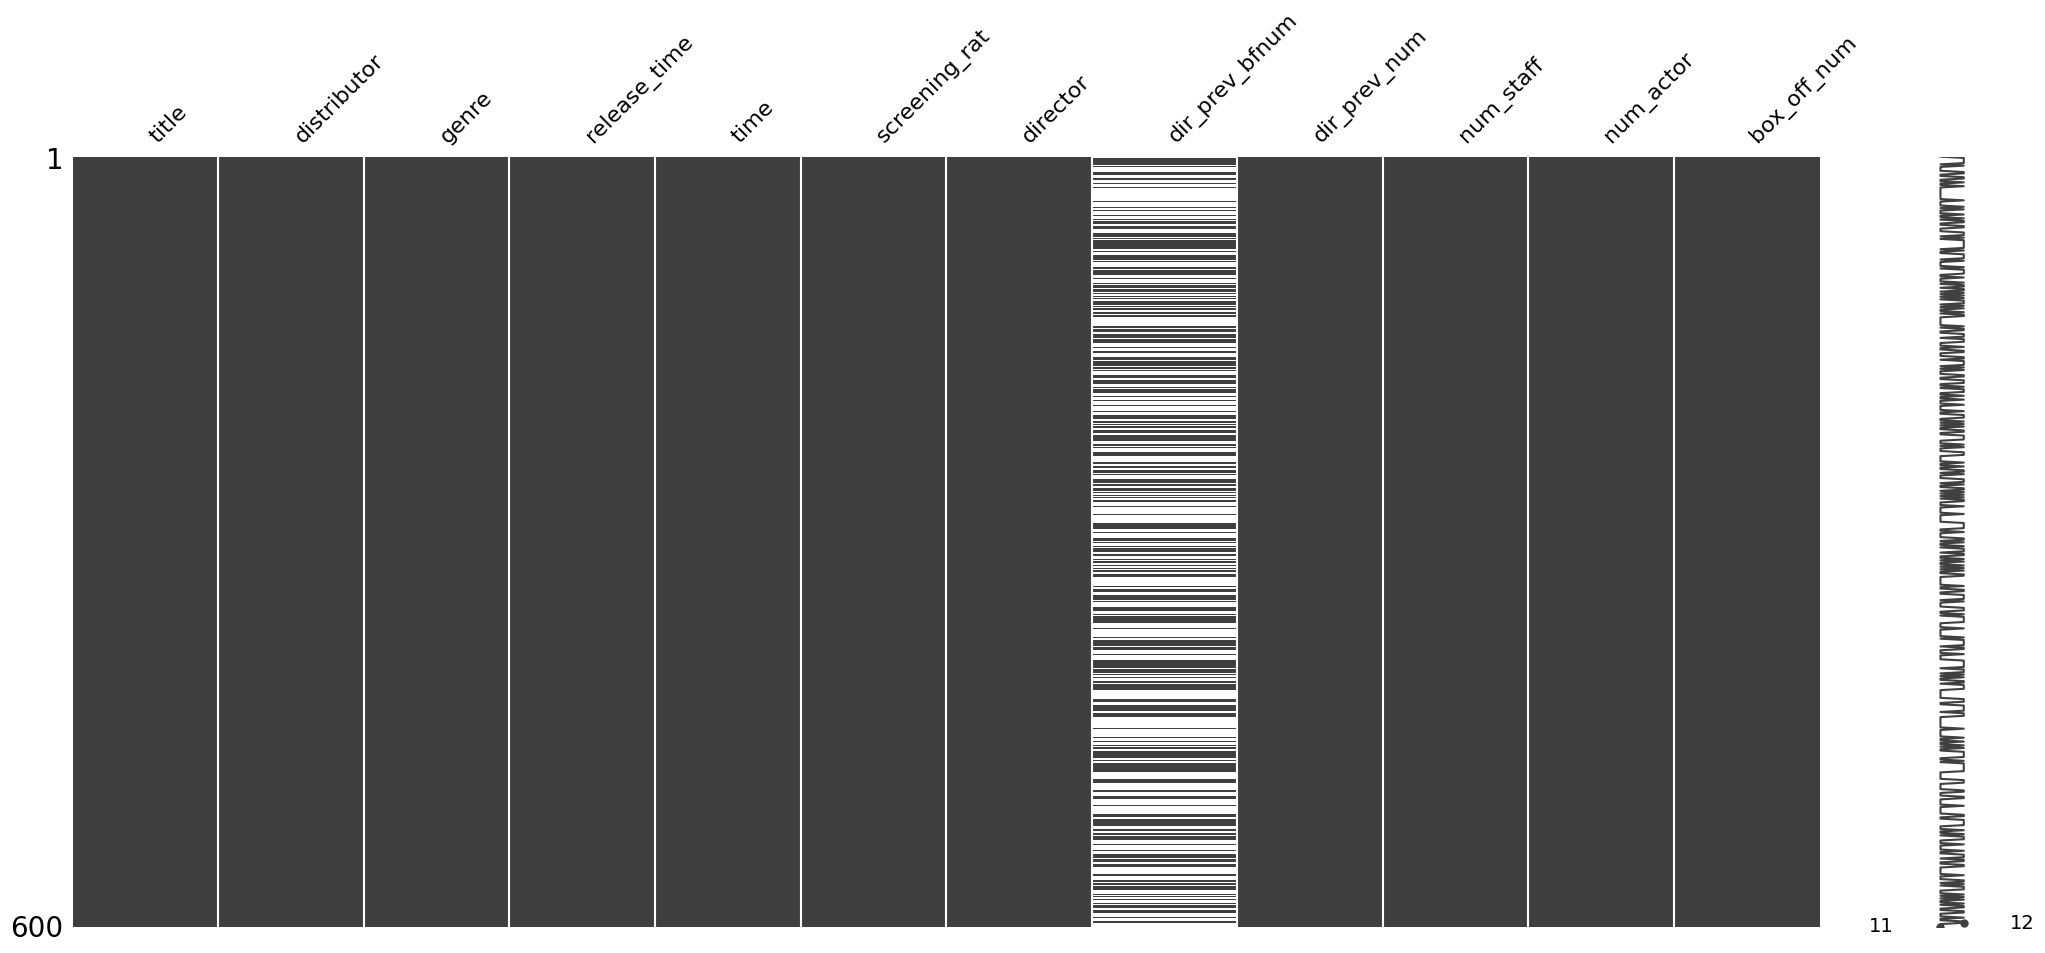

In [38]:
import missingno as msno
msno.matrix(df)

In [39]:
df.isna().mean()

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [40]:
# # 절반정도의 데이터를 날려야함 -> 별로임
# df['dir_prev_bfnum'].isna()
# df_test = df.dropna(subset=['dir_prev_bfnum'])

In [41]:
# 결측치가 있는 데이터의 감독은 ?
# 결측치 주변 데이터를 확인 - 살릴지 죽일지
# 결측치가 생긴 원인파악? - 이전 영화가 없는 감독이면.. 정상적인 데이터

In [42]:
df = df.fillna(0)
df.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [43]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


100000.0


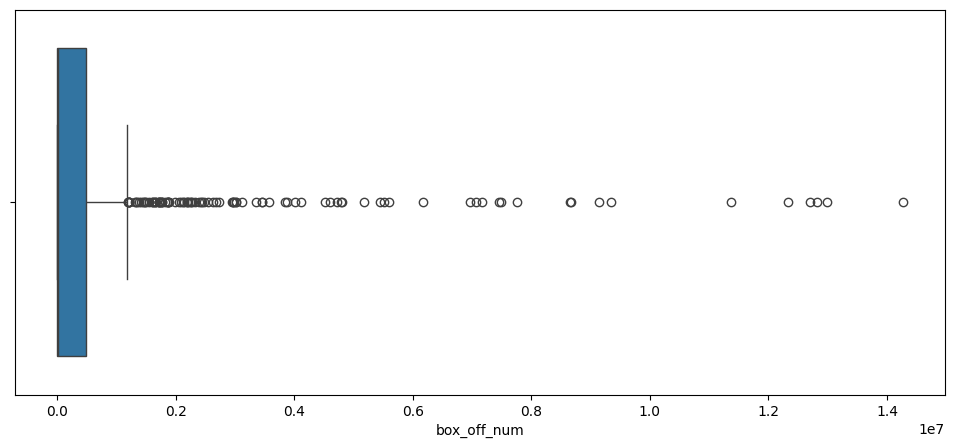

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='box_off_num')
print(0.1 * 1000000)

<Axes: >

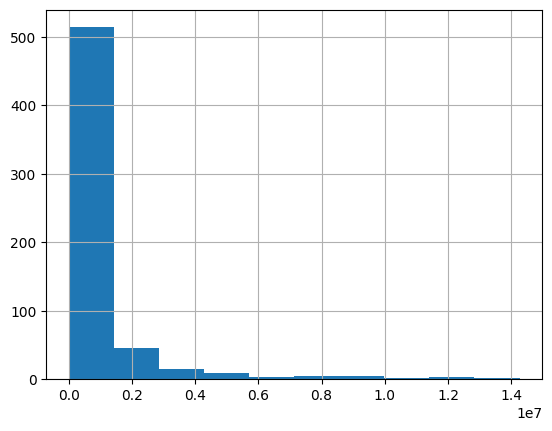

In [45]:
df.box_off_num.hist()

In [46]:
# 데이터 분포특성
# 왼쪽으로 치우쳐져서 오른쪽 꼬리가 긴 형태(대부분의 관객수는 5만명대에 형성되어 있고)
#  outlier가 많고 크다 즉.. 히트작의 영향이 크다

<Axes: >

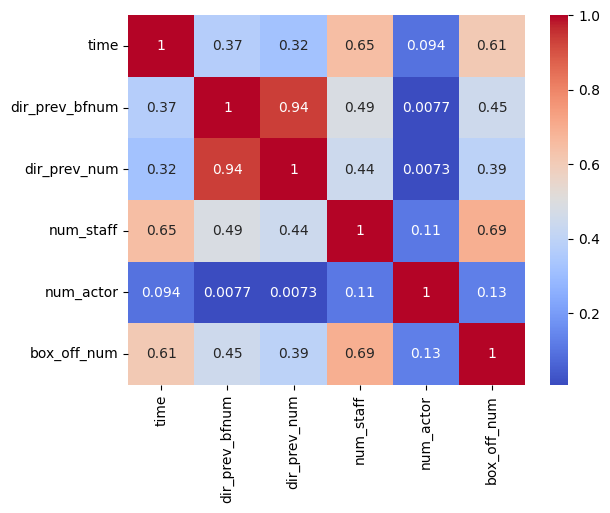

In [47]:
# 관객수  box_off_num과 높은 상관관계를 가지는 변수를 
corr = df.corr(method='spearman',numeric_only=True)
sns.heatmap(corr, annot=True,cmap='coolwarm')

In [48]:
#관객수는 상영시간과 스텝수 높은 상관관계 - 상영시간이 길수록 관객수가 증가하는 경향

In [49]:
df.describe(include=['object','category'])

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2010-09-16,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


In [50]:
df['box_off_num'].corr(df['time'],method='spearman')

np.float64(0.6094410730461675)

In [ ]:
'''
상관계수 두 변수간의 관계강도와 방향을 측정
피어슨 상관계수 : 선형관계를 측정, 데이터가 정규분포
스피어만 : 순위기반, 비선형관계나 또는 순서데이터(예: 순위, 크기)
'''

'''
피어슨 상관계수
두변수 x,y의 공분산을 각 변수의 표준편차로 나눈 값
1. 각 변수의 평균 계산
2. 각 데이터 포인트에서 평균을 뺀 값을 계산
3. 편차들의 곱 합 계산(공분산 분자 계산)
4. 각 편차 제곱합 계산
5. 분자 / (분모의 제곱근)으로 계산
'''

'''
스피어만 상관계수
두 변수의 순위(rank)를 변환한후 적용 - 실제 데이터 값 대신에 순위를 사용
'''

'''
1. 각 변수 x와 y의 데이터를 오름차순으로 정렬해 순위 부여(동점 평균순위 사용)
2. 각 데이터 쌍의 순위 차이(di = rankx - ranky)
3. di^2합 계산
4. 1 - (di^2합 계산 / n(n^2-1))
'''

In [ ]:
# x(온도) y(아이스링 판매량)
import numpy as np
X = np.array([20,25,30,35,40])
y = np.array([10,15,20,25,30])

x_mean = X.mean()
y_mean = y.mean()


In [ ]:
# 스피어만 상관계수